# Logistic Regression of Titanic Dataset

## Importing Required libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the datasets

In [4]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [9]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_df.shape

(891, 12)

In [11]:
train_df.shape[0] #no. of rows

891

## Calculating Null Values

In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Plotting Histogram

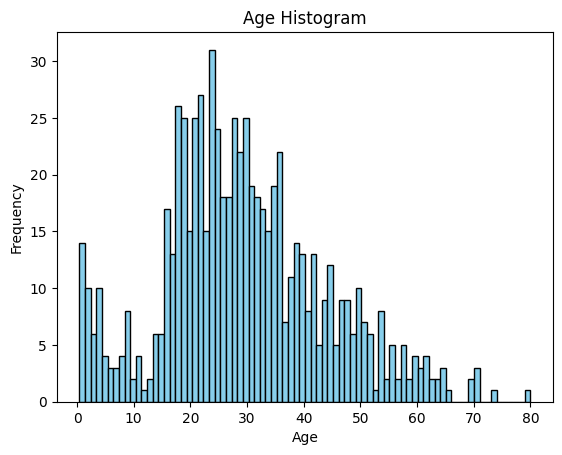

In [21]:
data = np.random.randn(1000)
 
# Plotting a basic histogram
plt.hist(train_df['Age'], bins=80, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
 
# Display the plot
plt.show()

This is a right skewed graph\
Mean > Median > Mode

In [19]:
data

array([ 2.03229902e-01,  5.40132863e-01, -5.07653707e-01, -7.34916391e-01,
       -1.19992716e-01,  1.32179125e+00, -2.21102526e-01, -9.32106278e-01,
       -5.47824446e-01,  1.99274703e-01,  2.62257330e-01,  5.56443756e-01,
       -4.97396865e-01,  8.93400557e-01, -3.59240989e-01, -1.33728453e+00,
       -4.70714888e-01, -6.98859329e-01, -2.26201953e+00, -7.54593378e-02,
        8.78429043e-01,  1.06356032e+00, -3.48357935e-01,  1.83603341e+00,
       -1.02830904e+00,  6.19944171e-01,  2.62618632e+00,  1.35627692e+00,
        6.88865036e-02,  7.97087559e-02, -1.44233893e+00,  5.42844916e-02,
       -5.38024309e-01, -1.49367912e-01,  9.52446995e-01, -1.26461600e+00,
        3.92549266e-01,  1.57616199e-01,  9.05171714e-01, -1.01957292e+00,
        1.51371973e-01, -2.53915826e-01, -4.06496600e-01, -1.45231944e+00,
       -7.37790244e-01,  9.11113225e-01, -9.72760380e-02,  1.99410216e+00,
        5.68999415e-01,  2.07638108e+00,  2.00989407e-01, -5.52885938e-01,
       -8.88072868e-02,  

## Values Imputation (mean,median,mode)

In [22]:
train_df['Age'].mean()

29.69911764705882

In [23]:
train_df['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [24]:
train_df['Age'].median()

28.0

***Now let us impute the values***

In [25]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)

C:\Users\meetu\AppData\Local\Temp\ipykernel_6424\3027320363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)


In [26]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Find the Percentage of values where cabin record is null

In [27]:
print('Percent of missing Cabin records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing Cabin records is 77.10%
